# Sleep Disorder Prediction Model

This notebook trains a simple Decision Tree model to predict sleep disorders based on health and lifestyle data.

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

sns.set_theme(style='darkgrid')

## 2. Load Data

In [3]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (6000, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 3. Data Preprocessing

In [4]:
# Handle missing values in target variable
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Drop Person ID
df = df.drop('Person ID', axis=1)

# Split Blood Pressure into two columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop('Blood Pressure', axis=1)

print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   6000 non-null   object 
 1   Age                      6000 non-null   int64  
 2   Occupation               6000 non-null   object 
 3   Sleep Duration           6000 non-null   float64
 4   Quality of Sleep         6000 non-null   int64  
 5   Physical Activity Level  6000 non-null   int64  
 6   Stress Level             6000 non-null   int64  
 7   BMI Category             6000 non-null   object 
 8   Heart Rate               6000 non-null   int64  
 9   Daily Steps              6000 non-null   int64  
 10  Sleep Disorder           6000 non-null   object 
 11  Systolic_BP              6000 non-null   int64  
 12  Diastolic_BP             6000 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 609.5+ KB


## 4. Exploratory Data Analysis

C:\Users\Tanya Vashishtha\AppData\Local\Temp\ipykernel_15924\814992098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sleep Disorder', palette='viridis')


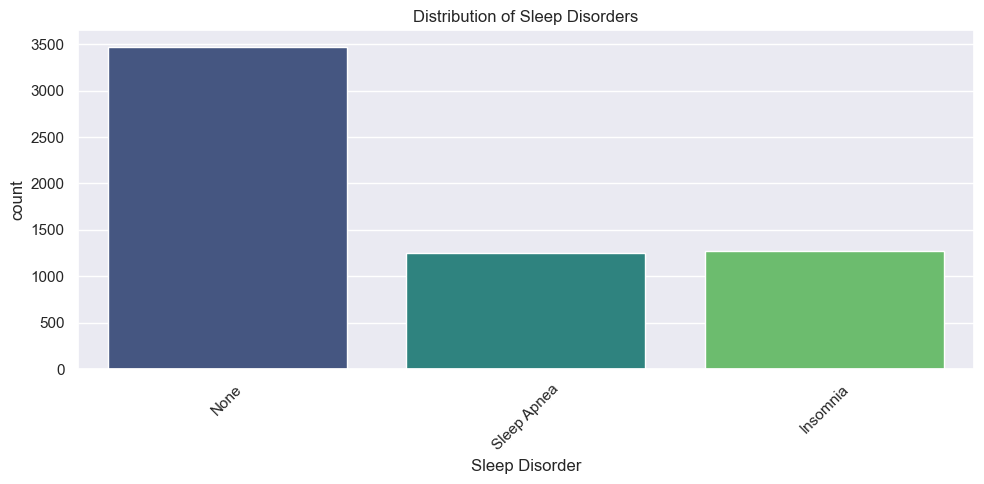

In [5]:
# Distribution of Sleep Disorders
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sleep Disorder', palette='viridis')
plt.title('Distribution of Sleep Disorders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

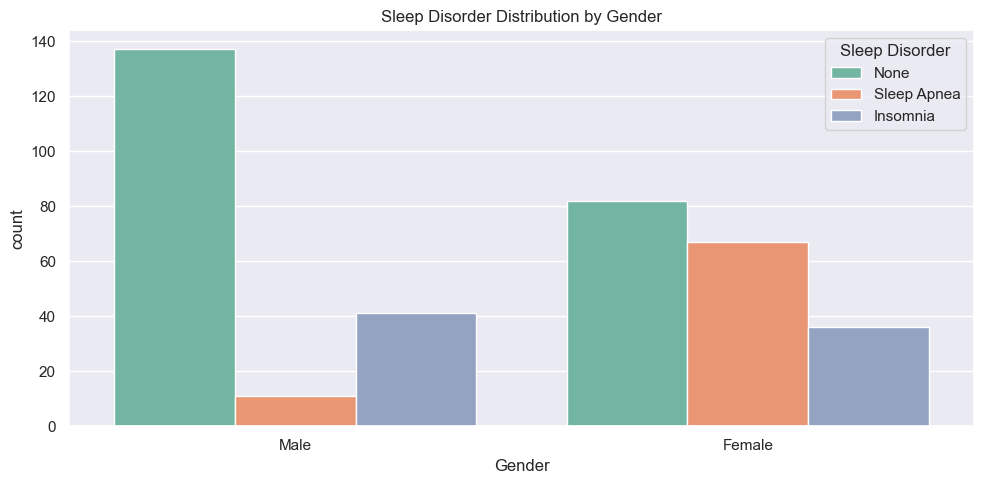

In [19]:
# Sleep Disorder by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender', hue='Sleep Disorder', palette='Set2')
plt.title('Sleep Disorder Distribution by Gender')
plt.tight_layout()
plt.show()

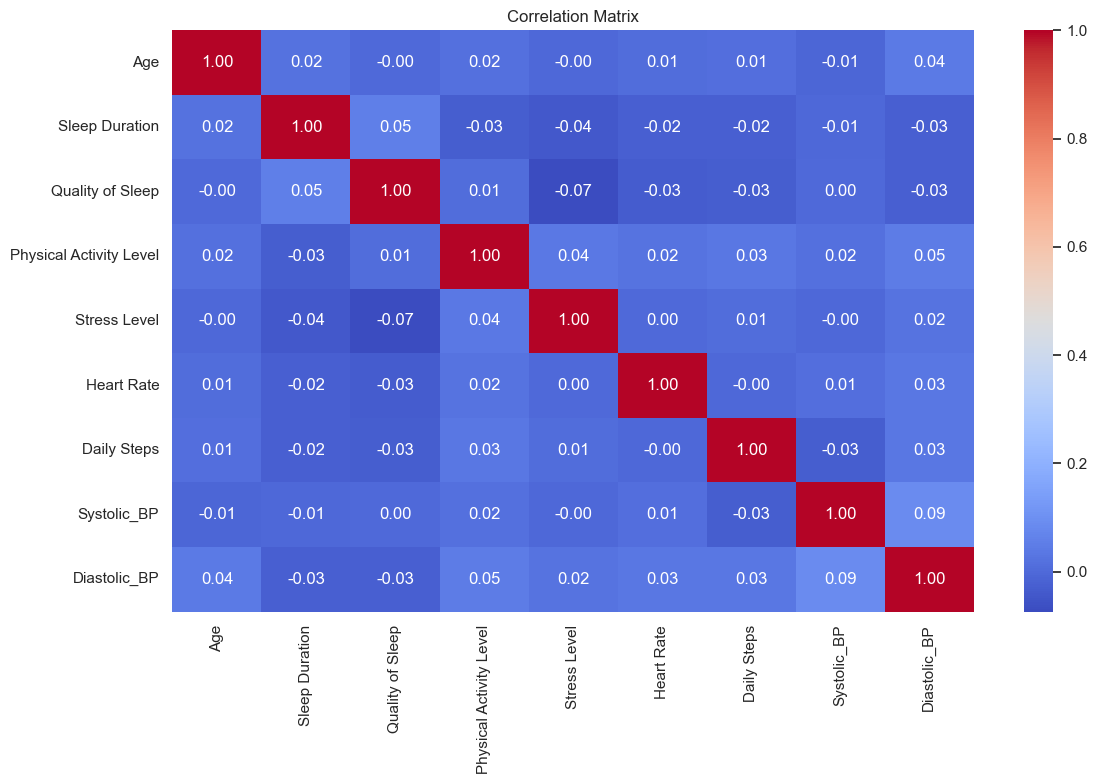

In [6]:
# Correlation heatmap for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 5. Encode Categorical Variables

In [7]:
# Store label encoders for later use
label_encoders = {}

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {le.classes_}")

df.head()

Gender: ['Female' 'Male']
Occupation: ['Accountant' 'Doctor' 'Engineer' 'Lawyer' 'Manager' 'Nurse'
 'Sales Representative' 'Salesperson' 'Scientist' 'Software Engineer'
 'Teacher']
BMI Category: ['Normal' 'Normal Weight' 'Obese' 'Overweight']
Sleep Disorder: ['Insomnia' 'None' 'Sleep Apnea']


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


## 6. Train-Test Split

In [8]:
# Separate features and target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (4200, 12)
Test set size: (1800, 12)


## 7. Train Decision Tree Model

In [9]:
# Create and train the model
model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


## 8. Model Evaluation

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['Sleep Disorder'].classes_))

Model Accuracy: 90.22%

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.85      0.88      0.87       377
        None       0.92      0.95      0.93      1047
 Sleep Apnea       0.90      0.81      0.85       376

    accuracy                           0.90      1800
   macro avg       0.89      0.88      0.88      1800
weighted avg       0.90      0.90      0.90      1800



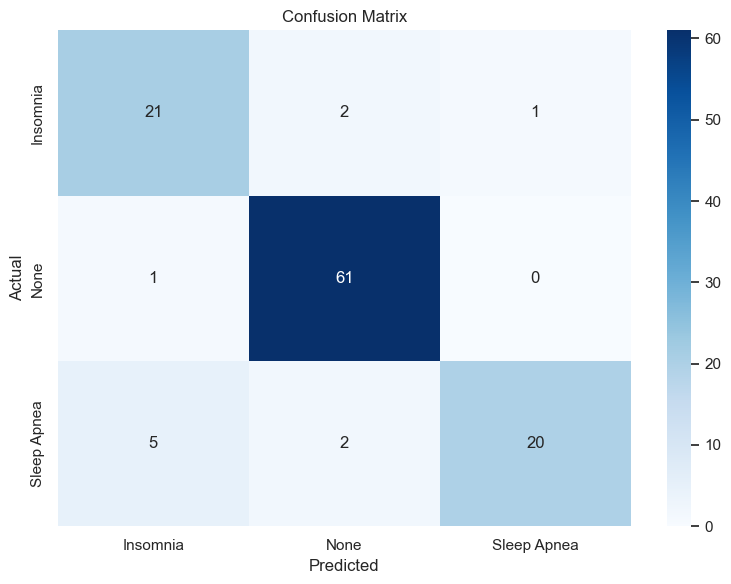

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoders['Sleep Disorder'].classes_,
            yticklabels=label_encoders['Sleep Disorder'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

C:\Users\Tanya Vashishtha\AppData\Local\Temp\ipykernel_15924\953961074.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')


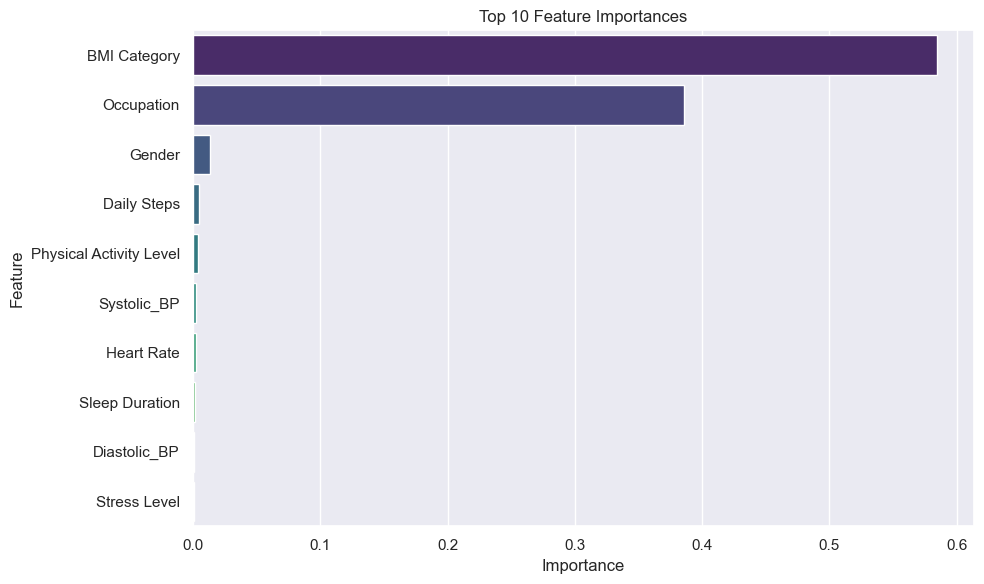

                    Feature  Importance
7              BMI Category    0.584498
2                Occupation    0.385593
0                    Gender    0.013572
9               Daily Steps    0.004342
5   Physical Activity Level    0.004124
10              Systolic_BP    0.002733
8                Heart Rate    0.002296
3            Sleep Duration    0.001489
11             Diastolic_BP    0.000756
6              Stress Level    0.000597
1                       Age    0.000000
4          Quality of Sleep    0.000000


In [11]:
# Feature Importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

print(feature_importance)

## 9. Save Model and Encoders

In [12]:
# Save all components in a single pickle file
model_data = {
    'model': model,
    'label_encoders': label_encoders,
    'feature_names': list(X.columns)
}

joblib.dump(model_data, 'sleep_disorder_model.pkl')
print("✅ Model saved successfully as 'sleep_disorder_model.pkl'")
print("\nSaved components:")
print("  - Trained Decision Tree model")
print("  - Label encoders for all categorical features")
print("  - Feature names")


✅ Model saved successfully as 'sleep_disorder_model.pkl'

Saved components:
  - Trained Decision Tree model
  - Label encoders for all categorical features
  - Feature names


## 10. Test Prediction

In [13]:
# Test with a sample prediction
sample = X_test.iloc[0:1]
prediction = model.predict(sample)
predicted_disorder = label_encoders['Sleep Disorder'].inverse_transform(prediction)[0]

print("Sample Input:")
print(sample)
print(f"\nPredicted Sleep Disorder: {predicted_disorder}")
print(f"Actual Sleep Disorder: {label_encoders['Sleep Disorder'].inverse_transform([y_test.iloc[0]])[0]}")

# Verify the saved model works
print("\n" + "="*50)
print("Testing Saved Model")
print("="*50)
loaded_data = joblib.load('sleep_disorder_model.pkl')
print("✅ Successfully loaded all components from single file!")
print(f"  - Model type: {type(loaded_data['model']).__name__}")
print(f"  - Number of encoders: {len(loaded_data['label_encoders'])}")
print(f"  - Number of features: {len(loaded_data['feature_names'])}")


Sample Input:
      Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
1782       1   59           1             8.8                 8   

      Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
1782                       83             6             0          70   

      Daily Steps  Systolic_BP  Diastolic_BP  
1782         8448          127            87  

Predicted Sleep Disorder: None
Actual Sleep Disorder: None

Testing Saved Model
✅ Successfully loaded all components from single file!
  - Model type: DecisionTreeClassifier
  - Number of encoders: 4
  - Number of features: 12
